# Exploratory data analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
%matplotlib inline

In [2]:
# read data
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

## Data Statistics
### Shape

In [3]:
# drop id column
if 'id' in train.columns:
    train = train.drop('id', axis=1)
print(train.shape)
print(train.info())

(188318, 131)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188318 entries, 0 to 188317
Columns: 131 entries, cat1 to loss
dtypes: float64(15), object(116)
memory usage: 188.2+ MB
None


In [4]:
# check number of categorical and continus variable
cats, conts = [], []
for col_name in train.columns:
    if train.dtypes.loc[col_name] == "O":
        cats.append(col_name)
    elif train[col_name].dtypes == "float64":
        conts.append(col_name)
conts = [cont for cont in conts if cont not in ['loss']]
print("There are {} categorical variables, {} continuous variables.".format(len(cats), len(conts)))

# check missing values
if pd.isnull(train).values.any():
    print("There are missing values in the training set")
else:
    print("There is no missing value in the training set.")

There are 116 categorical variables, 14 continuous variables.
There is no missing value in the training set.


### Check continuous variable

In [11]:
display(train.describe())

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


Correlation matrix between features:


,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
cont1,1.000000,-0.085180,-0.445431,0.367549,-0.025230,0.758315,0.367384,0.361163,0.929912,0.808551,0.596090,0.614225,0.534850,0.056688
cont2,-0.085180,1.000000,0.455861,0.038693,0.191427,0.015864,0.048187,0.137468,-0.032729,0.063526,0.116824,0.106250,0.023335,-0.045584
cont3,-0.445431,0.455861,1.000000,-0.341633,0.089417,-0.349278,0.097516,-0.185432,-0.417054,-0.325562,0.025271,0.006111,-0.418203,-0.039592
cont4,0.367549,0.038693,-0.341633,1.000000,0.163748,0.220932,-0.115064,0.528740,0.328961,0.283294,0.120927,0.130453,0.179342,0.017445
cont5,-0.025230,0.191427,0.089417,0.163748,1.000000,-0.149810,-0.249344,0.009015,-0.088202,-0.064967,-0.151548,-0.148217,-0.082915,-0.021638
cont6,0.758315,0.015864,-0.349278,0.220932,-0.149810,1.000000,0.658918,0.437437,0.797544,0.883351,0.773745,0.785144,0.815091,0.042178
cont7,0.367384,0.048187,0.097516,-0.115064,-0.249344,0.658918,1.000000,0.142042,0.384343,0.492621,0.747108,0.742712,0.288395,0.022286
cont8,0.361163,0.137468,-0.185432,0.528740,0.009015,0.437437,0.142042,1.000000,0.452658,0.336588,0.302381,0.315904,0.476402,0.043539
cont9,0.929912,-0.032729,-0.417054,0.328961,-0.088202,0.797544,0.384343,0.452658,1.000000,0.785697,0.608000,0.626656,0.642028,0.074154
cont10,0.808551,0.063526,-0.325562,0.283294,-0.064967,0.883351,0.492621,0.336588,0.785697,1.000000,0.702896,0.713812,0.707876,0.041808


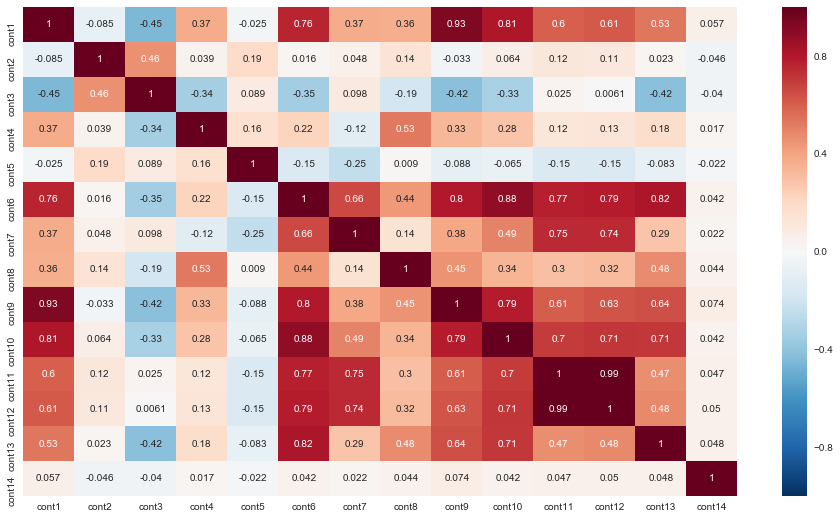

In [7]:
correlations = train[conts].corr()
print("Correlation matrix between features:")
display(correlations)

# use seaborn to visualize corr
plt.subplots(figsize=(16,9))
sns.heatmap(correlations, vmin=-1, vmax=1, annot=True)

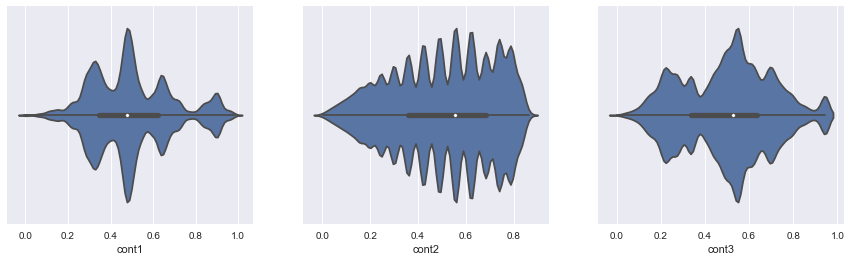

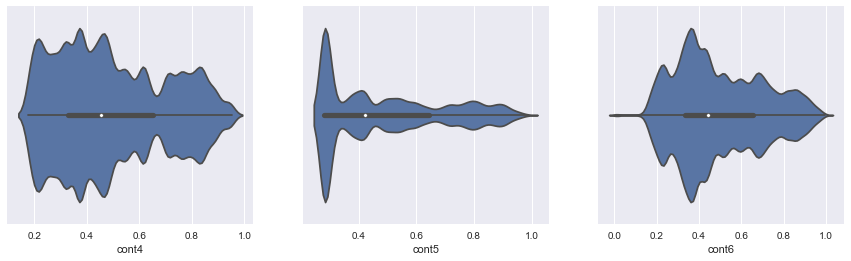

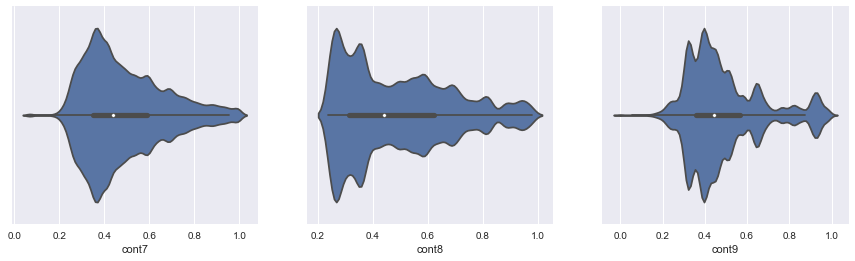

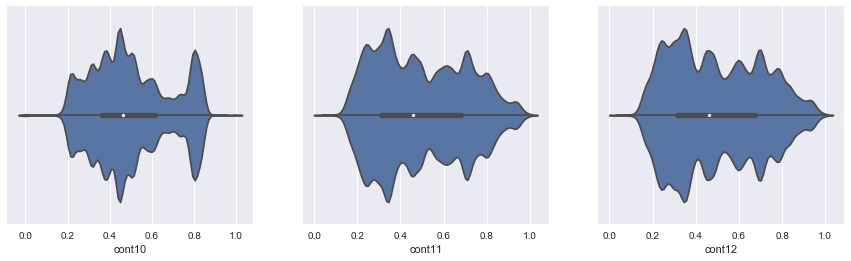

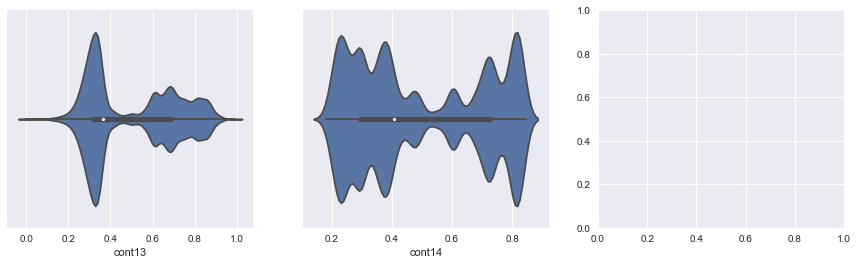

In [8]:
# plot for continuous variables
n_cols = 3
n_rows = 5

for i in range(n_rows):
    fig, ax = plt.subplots(ncols=n_cols, nrows=1, figsize=(15,4))
    for j in range(n_cols):
        #sns.distplot(train[conts[col_index]], hist=False, rug=True) # dist plot is very slow!
        idx = i*n_cols + j
        if idx < len(conts): # leave the last plot blank, otherwise it will be out of index
            sns.violinplot(x=conts[idx], data=train, ax=ax[j])

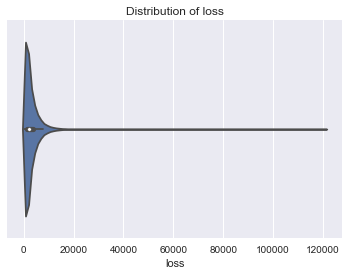

Skewness of target: 3.7949583775378604


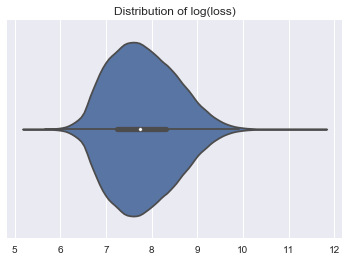

In [59]:
# plot for target
sns.violinplot(x='loss', data=train)
plt.title('Distribution of loss')
plt.show()

loss_skew = pd.DataFrame.skew(train['loss'])
print("Skewness of target: {}".format(loss_skew))

sns.violinplot(x=np.log(np.array(train['loss']) + 200)) 
plt.title('Distribution of log(loss)')
plt.show()

/Users/caoxiang/anaconda3/lib/python3.6/site-packages/matplotlib/ticker.py:2041: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  "Data has no positive values, and therefore cannot be "
/Users/caoxiang/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


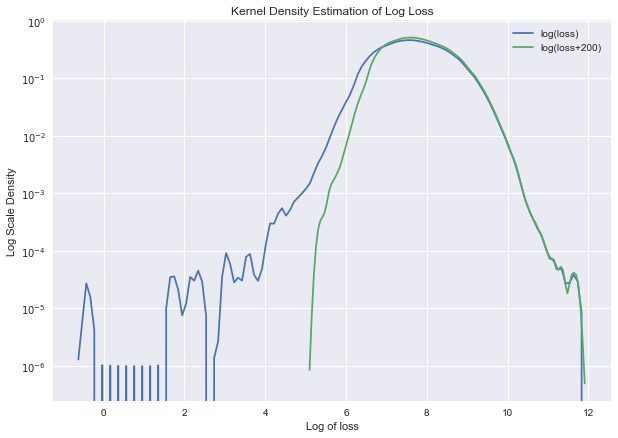

In [17]:
# check the shift of 200 vs. no shift
plt.figure(figsize= (10,7))
ax = plt.gca()
ax.set_yscale('log')
sns.distplot(np.log(np.array(train['loss'])), hist=False, label="log(loss)")
sns.distplot(np.log(np.array(train['loss']) + 200), hist=False, label="log(loss+200)")

plt.title("Kernel Density Estimation of Log Loss")
plt.xlabel("Log of loss")
plt.ylabel("Log Scale Density")

In [10]:
# skewness
print('Skewness of each feature:')
pd.DataFrame.skew(train[conts], axis=0)

Skewness of each feature:


cont1     0.516424
cont2    -0.310941
cont3    -0.010002
cont4     0.416096
cont5     0.681622
cont6     0.461214
cont7     0.826053
cont8     0.676634
cont9     1.072429
cont10    0.355001
cont11    0.280821
cont12    0.291992
cont13    0.380742
cont14    0.248674
dtype: float64

### Categorical Variables

In [45]:
# check unique values in categorical variables
cat_uniques = []
for cat in cats:
    cat_uniques.append(len(train[cat].unique()))
unique_values_cat = pd.DataFrame.from_items([('cat_name',cats), ('unique_values',cat_uniques)])

cat_unique_two = sum(unique_values_cat['unique_values'] == 2)
print("There are {} out of {} categorial variables have 2 unique values.".format(cat_unique_two, len(cats)))

There are 72 out of 116 categorial variables have 2 unique values


In [47]:
unique_values_cat

,cat_name,unique_values
0,cat1,2
1,cat2,2
2,cat3,2
3,cat4,2
4,cat5,2
5,cat6,2
6,cat7,2
7,cat8,2
8,cat9,2
9,cat10,2


/Users/caoxiang/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


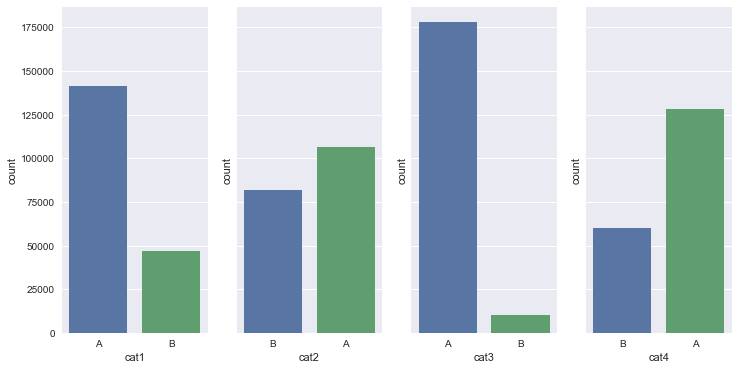

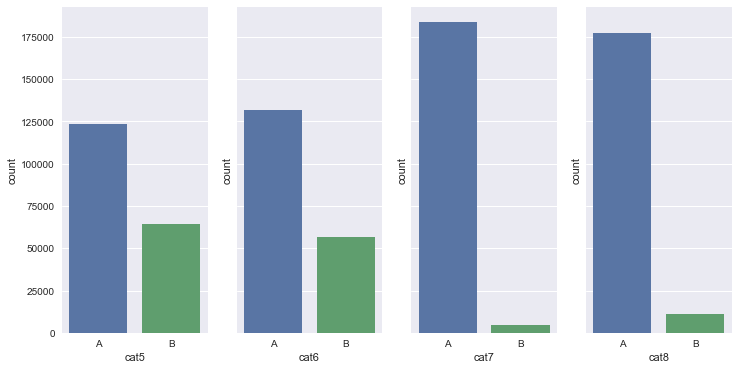

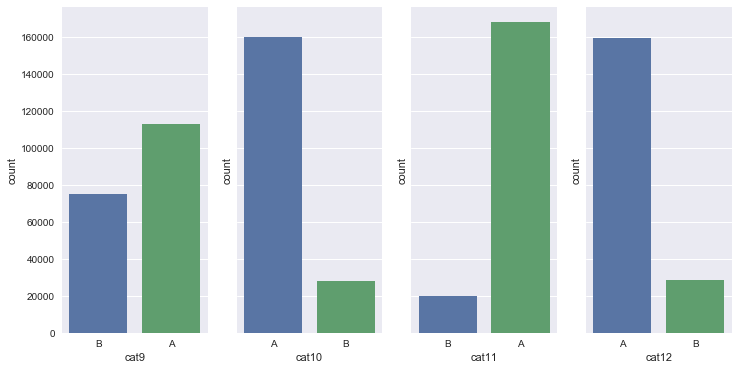

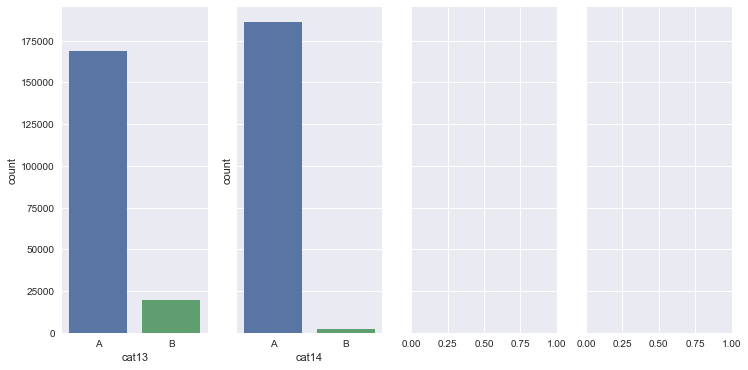

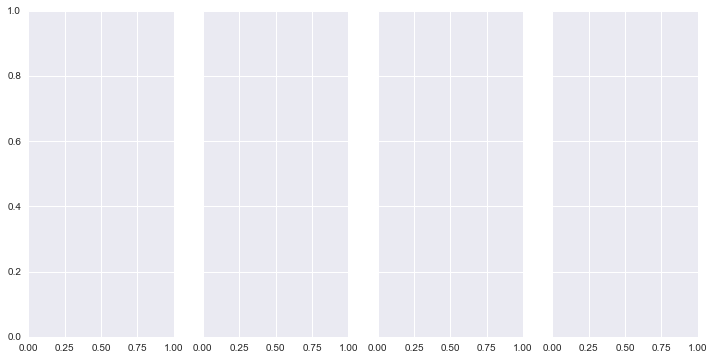

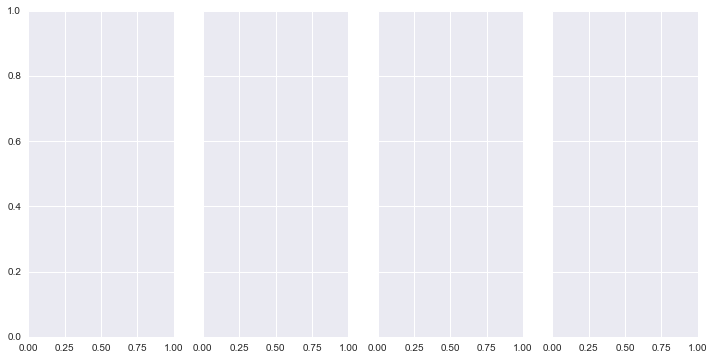

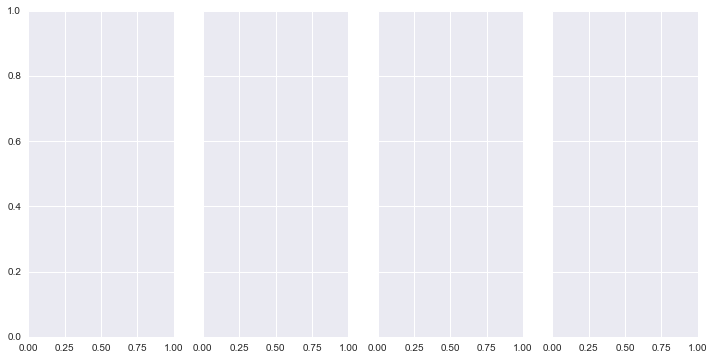

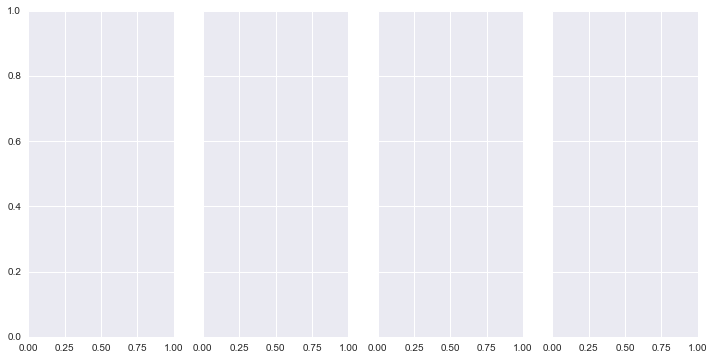

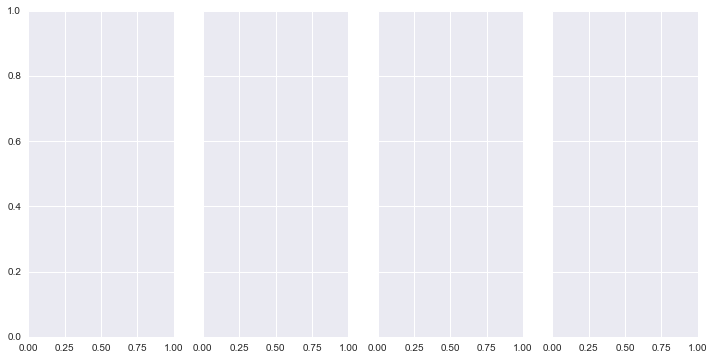

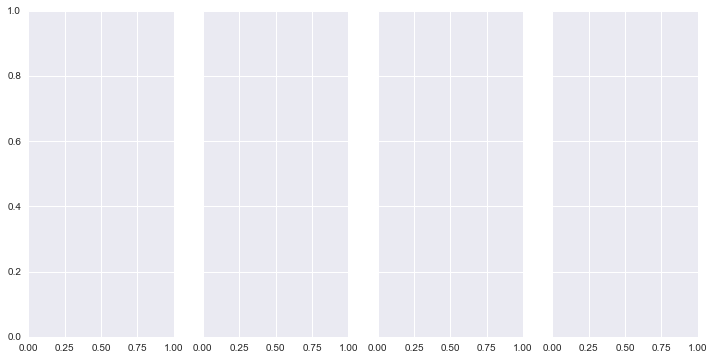

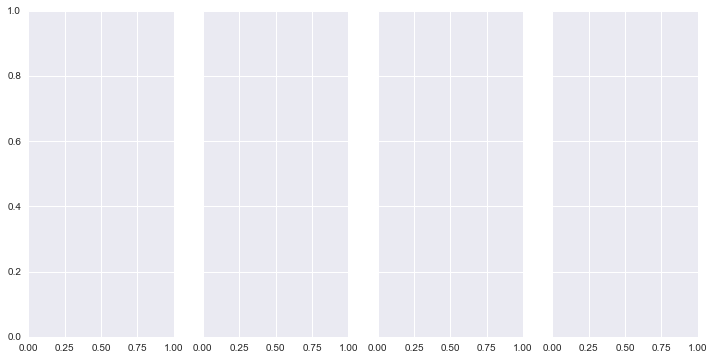

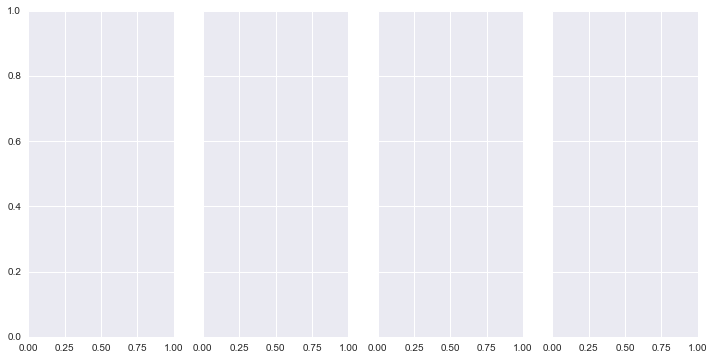

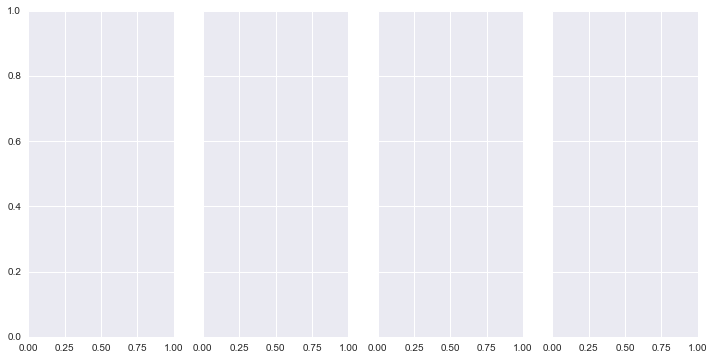

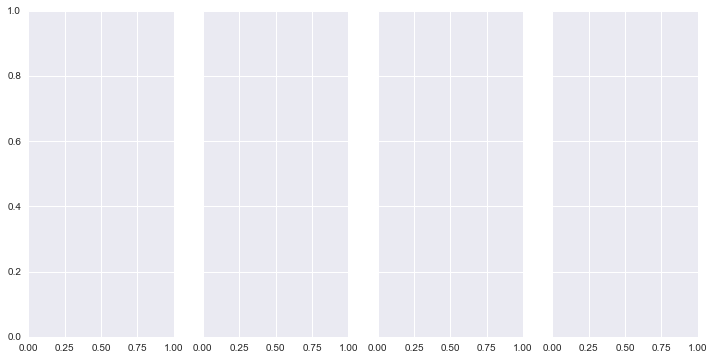

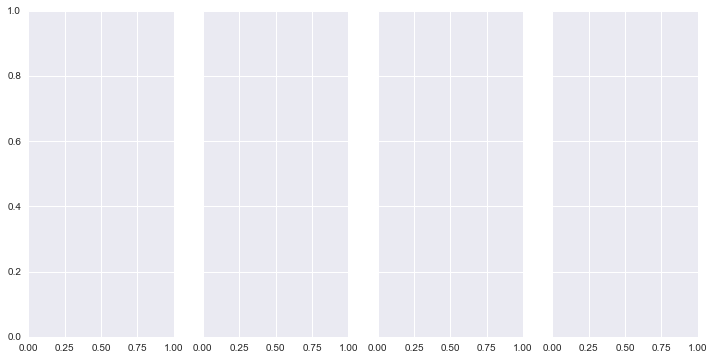

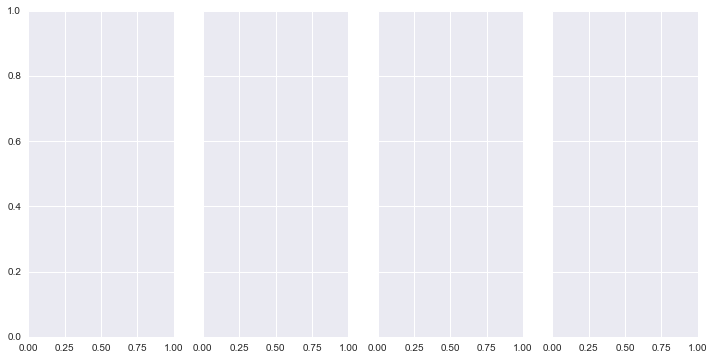

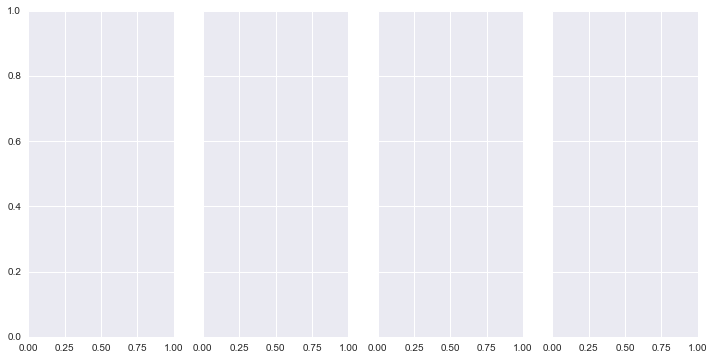

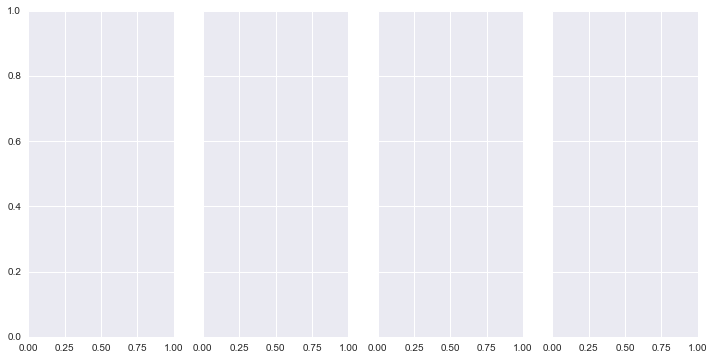

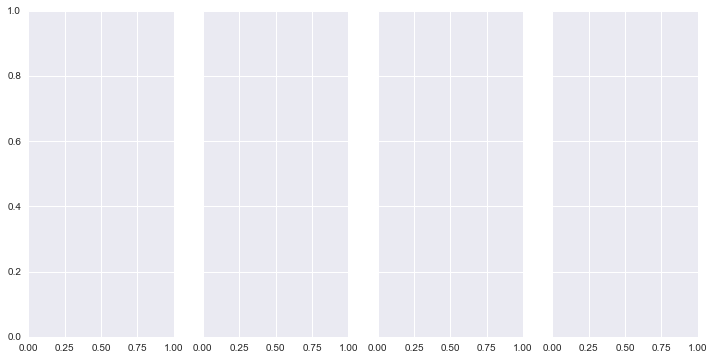

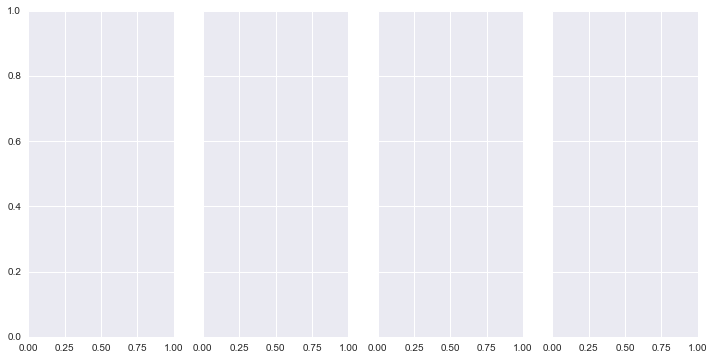

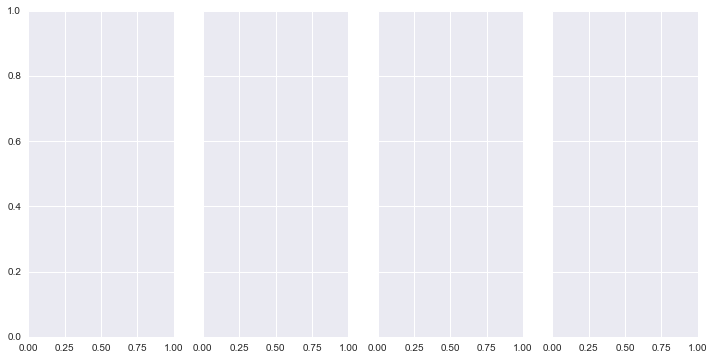

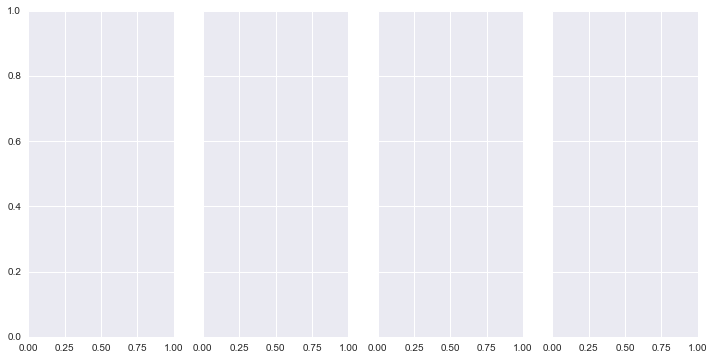

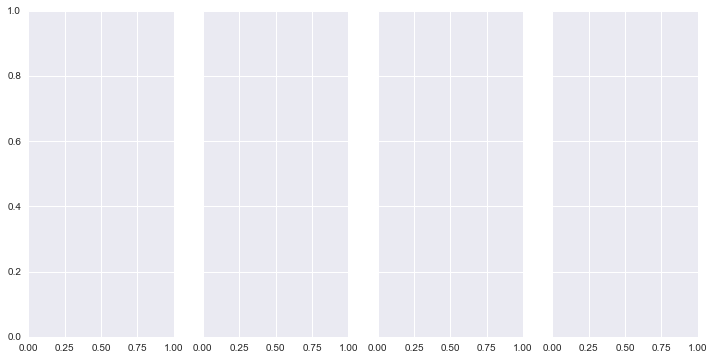

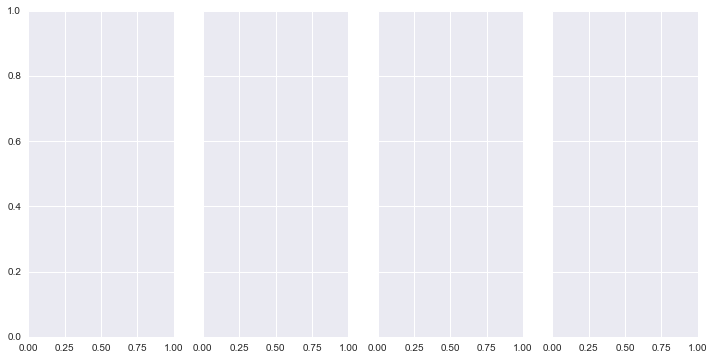

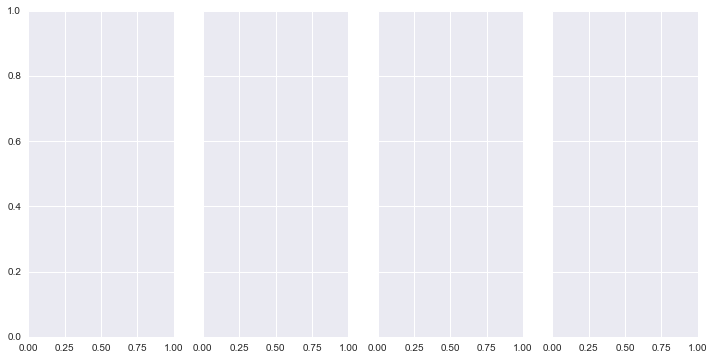

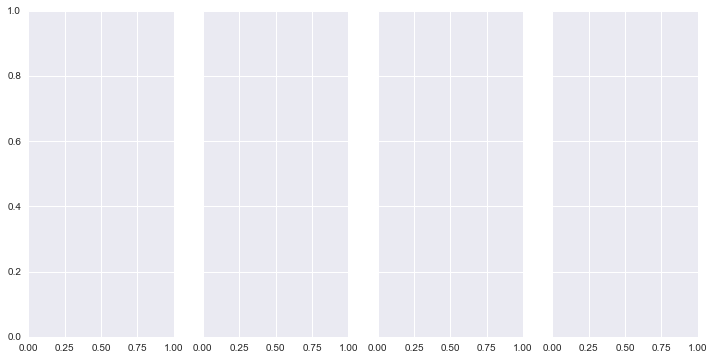

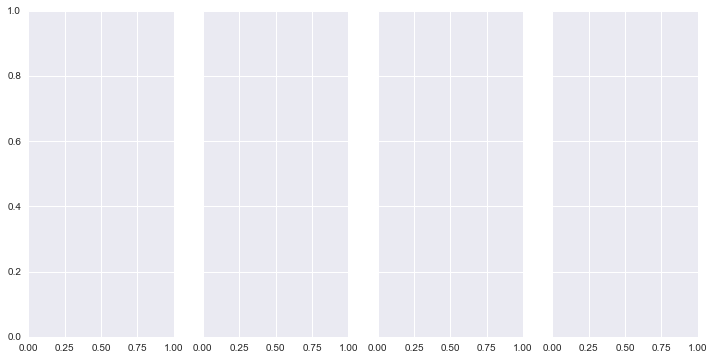

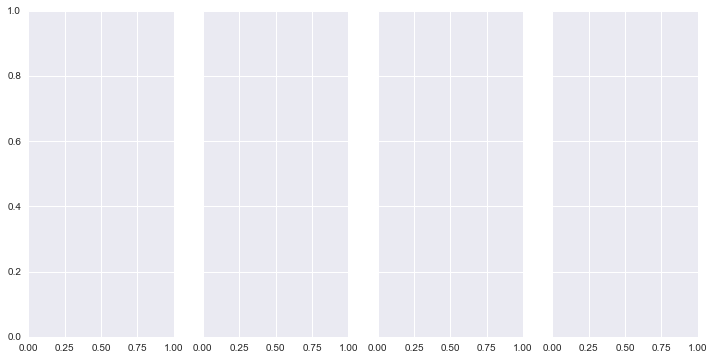

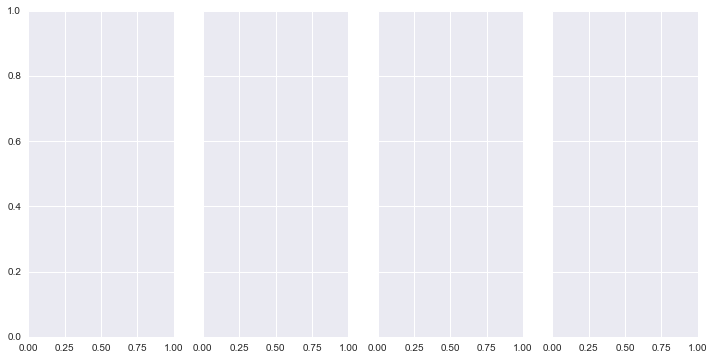

In [5]:
# plot for categorical variables
# looks like it only how 14 plots due to memeory constraint
n_cols = 4
n_rows = 29

for i in range(n_rows):
    fig, ax = plt.subplots(ncols=n_cols, nrows=1, sharey=True, figsize=(12,6))
    for j in range(n_cols):
        idx = i*n_cols + j
        if idx < len(conts): # leave the last plot blank, otherwise it will be out of index
            sns.countplot(x=cats[idx], data=train, ax=ax[j])

### Check Training and Testing sets distribution

We use machine learning technique to check whether training set and testing set are consistent. The idea is to combine training set and testing set, use one classifier like logistic regression seperate them. If the performance of the classifier is similar to random guess (AUC approximates 0.5), then it means training set and testing set are quite similar. For more details please refer [Adversarial Validation](http://fastml.com/adversarial-validation-part-one/)

In [24]:
# create new data sets
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

np.random.seed(123)
train_tmp = train.drop('loss', axis=1)
test_tmp = test.drop('id', axis=1)
train_tmp['target'] = 1
test_tmp['target'] = 0
combi = pd.concat((train_tmp, test_tmp))
combi = combi.iloc[np.random.permutation(len(combi))]
combi = pd.get_dummies(combi, columns = cats)

x = combi.drop('target', axis=1)
y = combi['target']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 123)

In [160]:
# fit logistic regression
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [176]:
pred = model.predict_proba(x_test)[:,1]
auc = metrics.roc_auc_score(y_test, pred)
print("Logistic regression AUC: {:.2%}".format(auc))

Logistic regression AUC: 50.10%


Our classifer cannot find difference between training set and testing set. It indicates training set and testing set are drawn from the same distribution.

### Visualize training and testing set using PCA and T-SNE

### PCA

In the scatter plot of first two PCA components, the training set and testing set mixed with each other. 

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
x_reduced = pca.fit_transform(x)

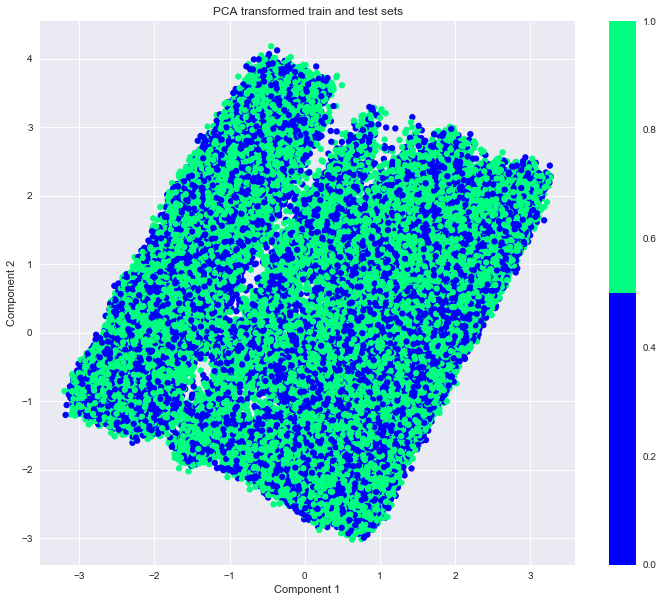

In [26]:
# Train = 1, Test = 0
plt.figure(figsize=(12,10))
plt.scatter(x_reduced[:, 0], x_reduced[:, 1], c=combi['target'],
            edgecolor='none', s=40,
            cmap=plt.cm.get_cmap('winter', 2))
plt.title('PCA transformed train and test sets')
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.colorbar()
plt.show()

### T-SNE
The kernal died due to high dimension?

In [ ]:
from sklearn.manifold import TSNE
from bhtsne import tsne
model = TSNE(n_components=2, random_state=0)
np.set_printoptions(suppress=True)
tsne_data = model.fit_transform(x) 
data_plot = pd.concat([pd.DataFrame(tsne_data), y], axis=1)
data_plot.columns = ['x', 'y', 'Channel']

In [ ]:
sns.lmplot(x='x', y='y', data =data_plot, hue='Channel', fit_reg=False)
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)
plt.title('t-SNE', fontsize=16)